In [26]:
library(plyr)
library(dplyr)
library(Matrix)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(stringr)
library(ggsci)
library(cowplot)
library(RColorBrewer)
library(colorspace)
library(ggthemes)
library(scales)
library(ggrepel)
library(tidyr)
library(wesanderson)
library(ggbreak)
library(dutchmasters)

In [27]:
setwd('/home/jovyan/data/GCA/')
cd248<-read.csv('CD248_scoring.csv')
cd248<-melt(cd248, id = 'condition')
cd248<-cd248 %>% filter(value != 'NA')

In [28]:
head(cd248)

,condition,variable,value
,<chr>,<fct>,<dbl>
1,GCA,adventitia,40.64444
2,GCA,adventitia,43.60000
3,GCA,adventitia,12.45000
4,GCA,adventitia,22.90000
5,control,adventitia,11.32857
6,control,adventitia,11.20000


Saving 6.67 x 6.67 in image



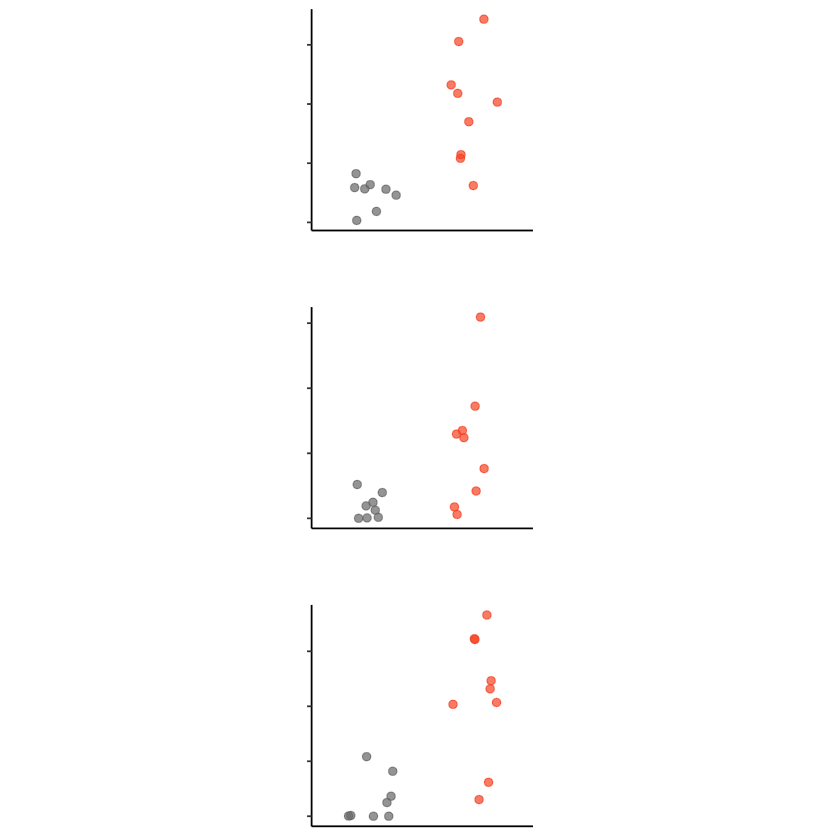

In [29]:
ggplot(cd248, aes(x=condition, y=value))+
geom_point(aes(fill = condition, color = condition), 
           size = 2, alpha = 0.7, 
           position = position_jitter(width=0.25, height=0)) +
  facet_wrap(~ variable, scales = 'free', ncol = 1) +
scale_color_manual(values = rev(c('#f44323', '#656665'))) + 
theme(aspect.ratio = 1) + 
theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
       axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
          axis.text.y=element_blank(),
      axis.title.y=element_blank()) +
theme(legend.position="none") +
theme(strip.background = element_blank(), 
     strip.text.x = element_blank(),
     panel.spacing.y = unit(3, "lines"), panel.spacing.x = unit(2, "lines"))+


theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

setwd('/home/jovyan/data/GCA/figures')
ggsave('cd248_scoring.png', dpi = 300)

In [29]:
adventitia <- cd248 %>% filter(variable == 'adventitia')
t.test(adventitia$value[adventitia$condition=="GCA"], adventitia$value[adventitia$condition=="control"])


	Welch Two Sample t-test

data:  adventitia$value[adventitia$condition == "GCA"] and adventitia$value[adventitia$condition == "control"]
t = 4.5782, df = 9.3494, p-value = 0.001206
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 14.96624 43.87678
sample estimates:
mean of x mean of y 
39.059457  9.637946 


In [30]:
media <- cd248 %>% filter(variable == 'media')
t.test(media$value[media$condition=="GCA"], media$value[media$condition=="control"])


	Welch Two Sample t-test

data:  media$value[media$condition == "GCA"] and media$value[media$condition == "control"]
t = 2.9386, df = 8.7584, p-value = 0.01701
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.063406 8.308036
sample estimates:
mean of x mean of y 
5.6235185 0.9377976 


In [31]:
intima <- cd248 %>% filter(variable == 'intima')
t.test(intima$value[intima$condition=="GCA"], intima$value[intima$condition=="control"])


	Welch Two Sample t-test

data:  intima$value[intima$condition == "GCA"] and intima$value[intima$condition == "control"]
t = 4.6355, df = 10.347, p-value = 0.0008483
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.943576 14.015229
sample estimates:
mean of x mean of y 
11.061486  1.582083 


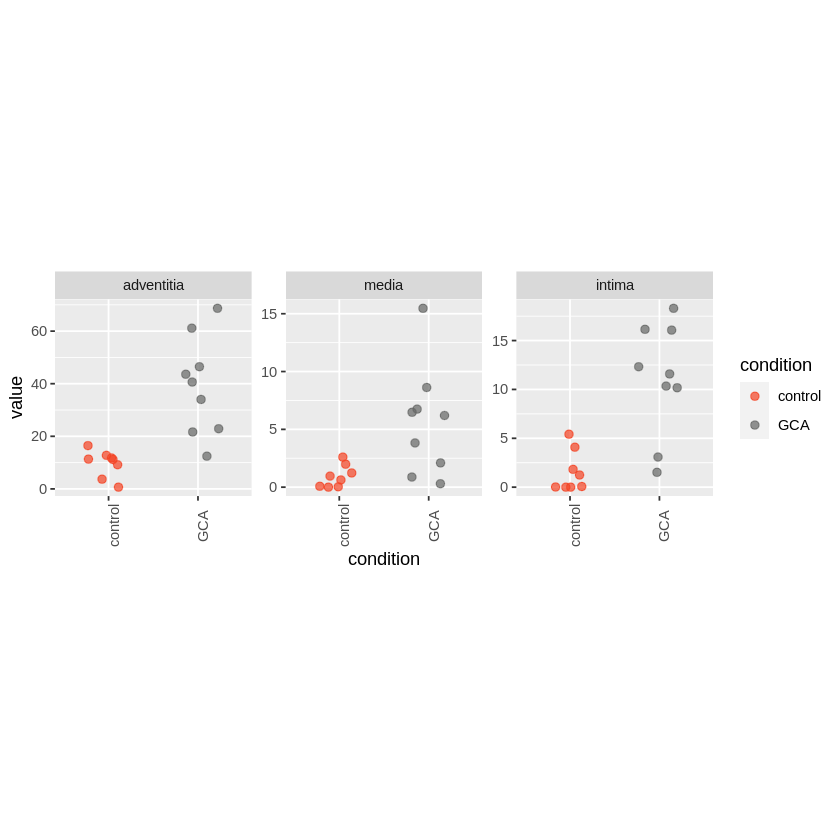

In [22]:
ggplot(cd248, aes(x=condition, y=value))+
geom_point(aes(fill = condition, color = condition), 
           size = 2, alpha = 0.7, 
           position = position_jitter(width=0.25, height=0)) +
  facet_wrap(~ variable, scales = 'free', ncol = 4) +
scale_color_manual(values = c('#f44323', '#656665')) + 
theme(aspect.ratio = 1/1) + 
theme(axis.text.x = element_text(angle = 90)) 
#theme(axis.title.x=element_blank(),
#      axis.text.x=element_blank(),
#        axis.ticks.x=element_blank(),
#           axis.text.y=element_blank(),
#      axis.title.y=element_blank()) +
#theme(legend.position="none") 
#theme(strip.background = element_blank(), 
#     strip.text.x = element_blank(),
#     panel.spacing.y = unit(3, "lines"), panel.spacing.x = unit(2, "lines"))+


#theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
#panel.background = element_blank(), axis.line = element_line(colour = "black"))



***Flow scoring***



In [32]:
df_1c = data.frame(diagnosis = c('no', 'no', 'no', 'no', 'gca', 'gca', 'gca'), value = c(87.6, 84.6, 82.6, 87.3, 34.5, 18.1, 21.8))
df_141 = data.frame(diagnosis = c('no', 'no', 'no', 'no', 'gca', 'gca', 'gca'), value = c(6.1, 4.88, 7.62, 1.42, 6.42, 7.86, 6.71))

In [33]:
t.test(c(87.6, 84.6, 82.6, 87.3), c(34.5, 18.1, 21.8))


	Welch Two Sample t-test

data:  c(87.6, 84.6, 82.6, 87.3) and c(34.5, 18.1, 21.8)
t = 11.893, df = 2.2296, p-value = 0.004628
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 40.78855 80.66145
sample estimates:
mean of x mean of y 
   85.525    24.800 


In [34]:
t.test(c(6.1, 4.88, 7.62, 1.42), c(6.42, 7.86, 6.71))


	Welch Two Sample t-test

data:  c(6.1, 4.88, 7.62, 1.42) and c(6.42, 7.86, 6.71)
t = -1.4316, df = 3.6357, p-value = 0.2323
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.011797  2.028464
sample estimates:
mean of x mean of y 
 5.005000  6.996667 


In [35]:
df_1c$diagnosis<-factor(df_1c$diagnosis, levels = rev(c('no', 'gca')))
df_141$diagnosis<-factor(df_141$diagnosis, levels = rev(c('no', 'gca')))

Saving 6.67 x 6.67 in image



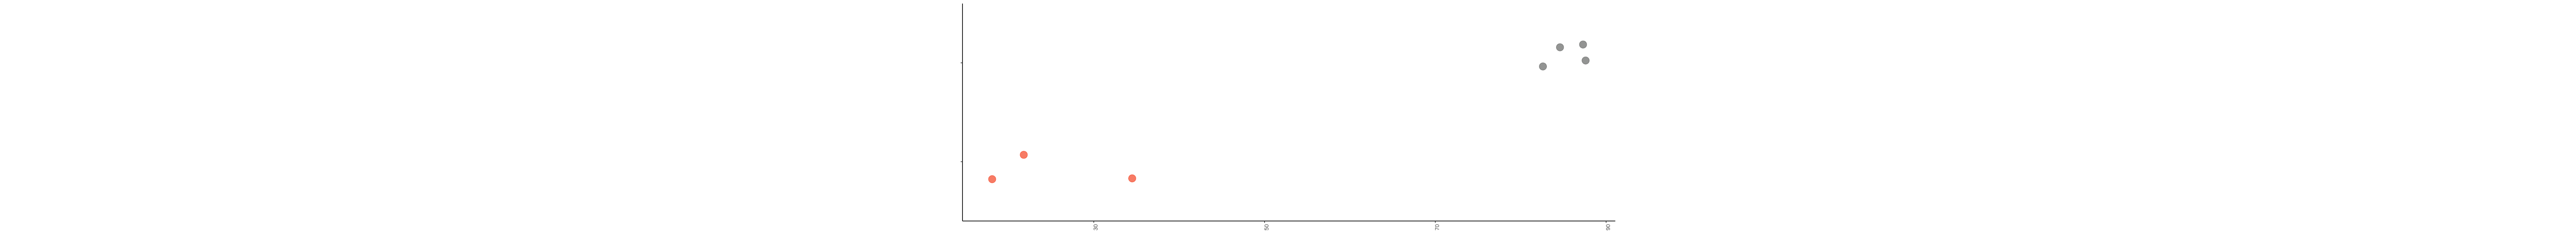

In [42]:
options(repr.plot.width=55, repr.plot.height=5)

ggplot(df_1c, aes(x=diagnosis, y=value))+
geom_point(aes(fill = diagnosis, color = diagnosis), 
           size = 5, alpha = 0.7, 
           position = position_jitter(width=0.25, height=0)) +
scale_color_manual(values = c('#f44323', '#656665')) + coord_flip()+
theme(aspect.ratio = 1/3) + 
theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
#       axis.text.x=element_blank(),
#        axis.ticks.x=element_blank(),
          axis.text.y=element_blank(),
      axis.title.y=element_blank()) +
theme(legend.position="none") +
theme(strip.background = element_blank(), 
     strip.text.x = element_blank(),
     panel.spacing.y = unit(3, "lines"), panel.spacing.x = unit(2, "lines"))+


theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

setwd('/home/jovyan/data/GCA/figures')
ggsave('flow_scoring_1c.png', dpi = 300)

Saving 6.67 x 6.67 in image



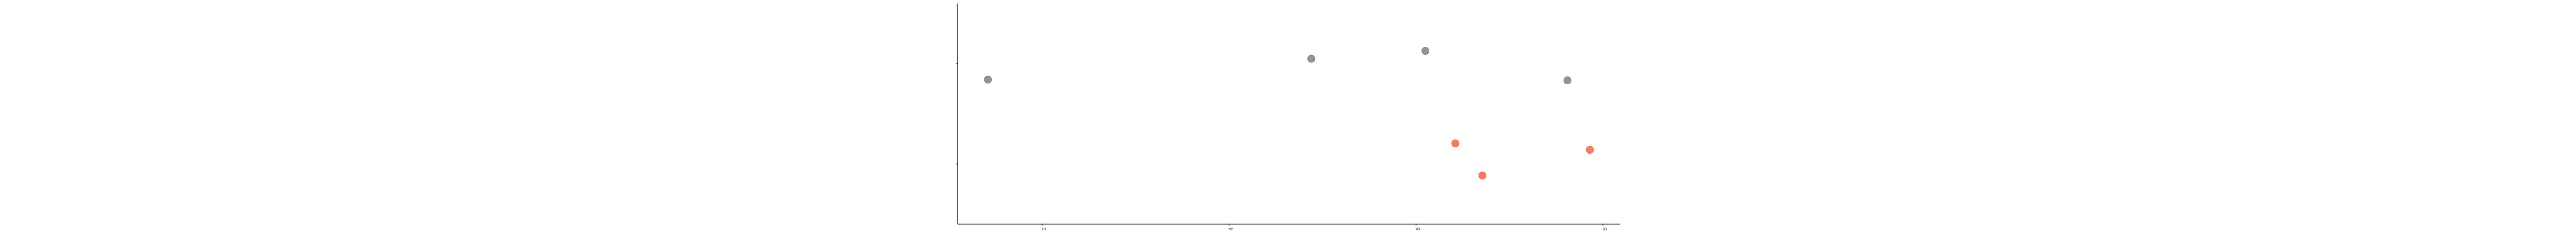

In [44]:
options(repr.plot.width=55, repr.plot.height=5)

ggplot(df_141, aes(x=diagnosis, y=value))+
geom_point(aes(fill = diagnosis, color = diagnosis), 
           size = 5, alpha = 0.7, 
           position = position_jitter(width=0.25, height=0)) +
scale_color_manual(values = c('#f44323', '#656665')) + coord_flip()+
theme(aspect.ratio = 1/3) + 
theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
#       axis.text.x=element_blank(),
#        axis.ticks.x=element_blank(),
          axis.text.y=element_blank(),
      axis.title.y=element_blank()) +
theme(legend.position="none") +
theme(strip.background = element_blank(), 
     strip.text.x = element_blank(),
     panel.spacing.y = unit(3, "lines"), panel.spacing.x = unit(2, "lines"))+


theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

setwd('/home/jovyan/data/GCA/figures')
ggsave('flow_scoring_141.png', dpi = 300)



***Shared clones between donors***



In [150]:
setwd('/home/jovyan/data/GCA/TCR_analysis')
tcr<-read.csv('TCR_summary_data_v6.csv', row.names = 1)

In [151]:
tcr$cell<-rownames(tcr)

In [152]:
#clones shared between donors

donor_shared <- tcr %>% group_by(clone_id) %>% summarise(unique_clones = n_distinct(patient_id)) %>% filter(unique_clones>1) %>% pull(clone_id)

In [153]:
length(donor_shared)

[1] 149

In [13]:
donor_shared_meta <- tcr %>% filter(clone_id %in% donor_shared)

In [14]:
plot_data<-donor_shared_meta %>% select(patient_id, clone_id, tissue, diagnosis) %>% group_by(patient_id, clone_id, tissue, diagnosis) %>% summarise(count = n())

`summarise()` has grouped output by 'patient_id', 'clone_id', 'tissue'. You can override using the `.groups` argument.



In [15]:
#add consensus annotation to the plotting data

anno_table<-as.data.frame.matrix(table(donor_shared_meta$clone_id, donor_shared_meta$anno))
anno_table$V1<-NULL
anno_table$consensus<-colnames(anno_table)[apply(anno_table,1,which.max)]
anno_table$clone_id<-rownames(anno_table)
temp<-anno_table %>% select(clone_id, consensus) %>% remove_rownames()

plot_data<-merge(plot_data, temp, by = 'clone_id', how = 'left')

In [16]:
plot_data$clone_id<-as.factor(plot_data$clone_id)

In [17]:
unique(plot_data$consensus)

[1] "CD8_naive_blood"      "CD8_Eff_blood"        "CD8_tissue"          
 [4] "CD4_1_tissue"         "CD4_cytotoxic_blood"  "MyoFB_tissue"        
 [7] "CD4_naive_CM_blood"   "Treg_blood"           "CD4_EM_blood"        
[10] "Endothelium_1_tissue"

In [18]:
plot_data<-plot_data %>% filter(!(consensus %in% c('Endothelium_1_tissue', 'MyoFB_tissue')))

In [19]:
plot_data$consensus<-factor(plot_data$consensus, levels = c('CD4_naive_CM_blood', 'CD4_EM_blood', 'CD4_cytotoxic_blood', 'Treg_blood',
                                                             'CD8_naive_blood', 'CD8_Eff_blood',
                                                             'CD4_1_tissue', 'CD8_tissue'))

In [20]:
plot_data <- plot_data %>% group_by(clone_id) %>% mutate(total_in_clone = sum(count))

In [21]:
plot_data<-plot_data %>% arrange(consensus, total_in_clone)
plot_data$clone_id<-factor(plot_data$clone_id, levels = unique(plot_data$clone_id))

In [27]:
temp<-plot_data %>% filter(tissue == 'tissue') %>% group_by(clone_id) %>% summarise(n_distinct(diagnosis))
table(temp$`n_distinct(diagnosis)`)


 1  2 
67 64 

In [7]:
options(repr.plot.width=25, repr.plot.height=15)
ggplot(plot_data, aes(x=clone_id, y=count, fill = diagnosis)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar

  geom_bar(stat="identity") +

  ylim(-20,250) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid = element_blank(),
#   plot.margin = unit(rep(-1,4), "cm"),
    legend.position = 'none',
    plot.margin=unit(c(1,1,1.5,1.2),"cm")) + 
geom_segment(data=plot_data, aes(x = 0, xend = length(unique(clone_id)), y = 50, yend = 50), colour = "grey", alpha=1, size=0.3 , inherit.aes =TRUE ) +
geom_segment(data=plot_data, aes(x = 0, xend = length(unique(clone_id)), y = 100, yend = 100), colour = "grey", alpha=1, size=0.3 , inherit.aes =TRUE ) +
geom_segment(data=plot_data, aes(x = 0, xend = length(unique(clone_id)), y = 150, yend = 150), colour = "grey", alpha=1, size=0.3 , inherit.aes =TRUE ) +
geom_segment(data=plot_data, aes(x = 0, xend = length(unique(clone_id)), y = 200, yend = 200), colour = "grey", alpha=1, size=0.3 , inherit.aes =TRUE ) +
geom_bar(stat="identity") +
scale_fill_manual(values = c('#50cbd8', '#dd5f5f'))
#scale_y_break(c(150, 240))+
#coord_polar(start = 0)
#scale_y_log10()+ 
#theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size =10))
                                      
setwd('/home/jovyan/data/GCA/figures')
ggsave('clones_between_donors_v6_diagnosis.png', dpi = 300, width = 49)

ERROR: Error in ggplot(plot_data, aes(x = clone_id, y = count, fill = diagnosis)): object 'plot_data' not found
